# Introduction to Regression with statsmodels in Python


In [5]:
# Importing pandas
import pandas as pd

# Importing the course arrays
conversion = pd.read_csv("datasets/ad_conversion.csv")
churn = pd.read_csv("datasets/churn.csv")
fish = pd.read_csv("datasets/fish.csv")
sp500 = pd.read_csv("datasets/sp500_yearly_returns.csv")
taiwan_real_estate = pd.read_csv("datasets/taiwan_real_estate2.csv")

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

_Add your notes here_

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# view taiwan_real_estate top 5 rows
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


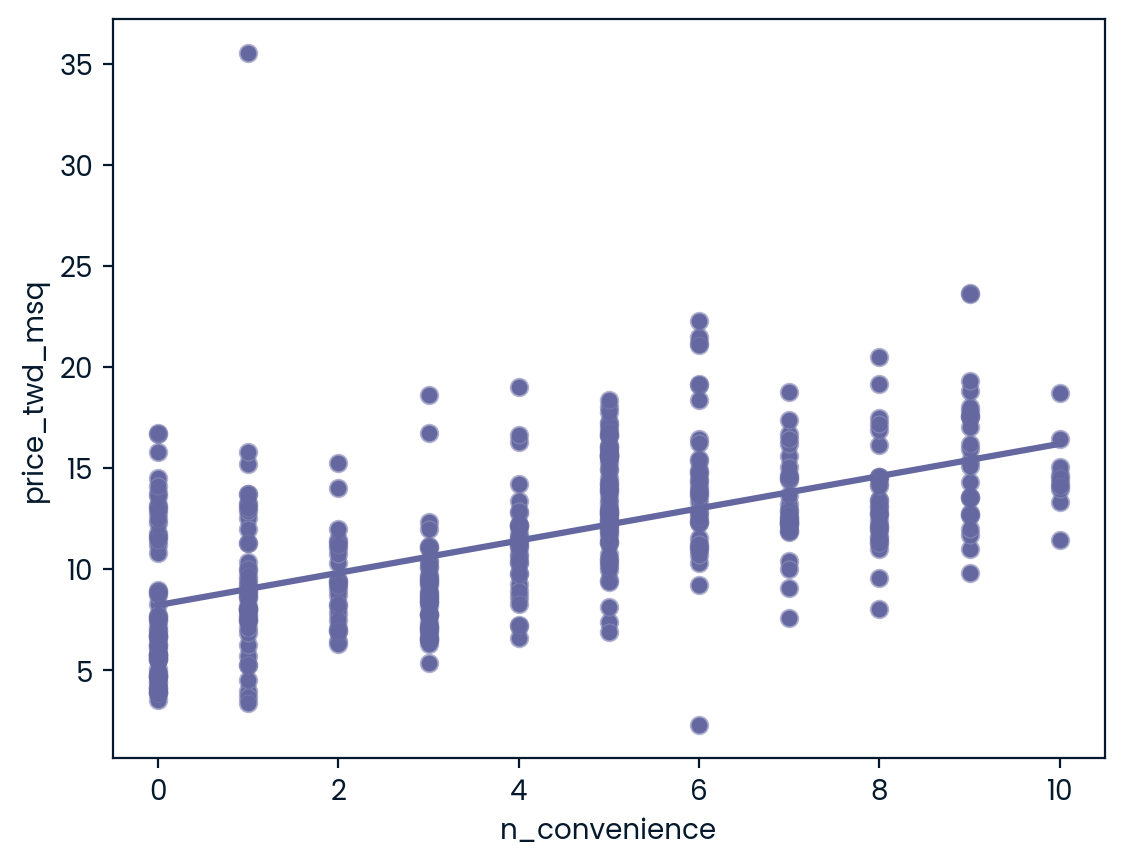

In [11]:
# Exploring dataset
# One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, we will make the points transparent. With "scatter_kws"
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

plt.show()

## OLS -> Ordinary Least Squares

In a linear regression model, we deal with finding the slope and the intercept of the regression line we saw above.

Hence, the formula that we use in linear regression is: -

**y' = m*x + c**

where, m -> slope of the regression line
       c -> intercept of the regression line, with the y-axis

We try to fine the optimum (m, c) values, such that the **sum of the squares** of the calculated(y') and actual response variable(y) values is minimum.

i.e. ∑(y-y')^2 -> minimize

Where, the y we obtain from the above mentioned equation is the calculated response variable(y'). Whereas, the response value mentioned in the dataset is the actual response variable value(y).

In our case above, we have x -> n_convenience, y -> price_twd_msq. We have to find out y' form the above mentioned linear regression equation.

## statsmodels.formula.api.ols

response_variable <-> target_variable
explanatory_variable <-> feature_varialbe

**_Method 1_** :

statsmodels.formula.api.ols(<br>
    &emsp;formula,<br>
    &emsp;data,<br>
    &emsp;subset=None,<br>
    &emsp;drop_cols=None,<br>
    &emsp;*args, **kwargs<br>
    )

formula, data -> required arguments

formula -> str (response_variable_column_name ~ explanatory_variable_column_name)
data -> pandas.Dataframe
<br><br>


**_Method 2_** :

statsmodels.api.OLS(response_variable_1d_array, explanatory_variable_1d_array)

In [23]:
# Method 1

# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [22]:
# Method 2

# Import the ols function
import statsmodels.api as sm

# explicitely create the target variable and the feature variable
x = taiwan_real_estate['n_convenience']
y = taiwan_real_estate['price_twd_msq']

# adding the constant term
x = sm.add_constant(x)

# Create the model object
mdl_price_vs_conv2 = sm.OLS(y, x)

# Fit the model
mdl_price_vs_conv2 = mdl_price_vs_conv2.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv2.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           3.41e-37
Time:                        10:40:29   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.2242      0.285     28.857

**The model had an Intercept coefficient of 8.2242. What does this mean?**
On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.

**The model had an n_convenience coefficient of 0.7981. What does this mean?**
If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

_The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house._

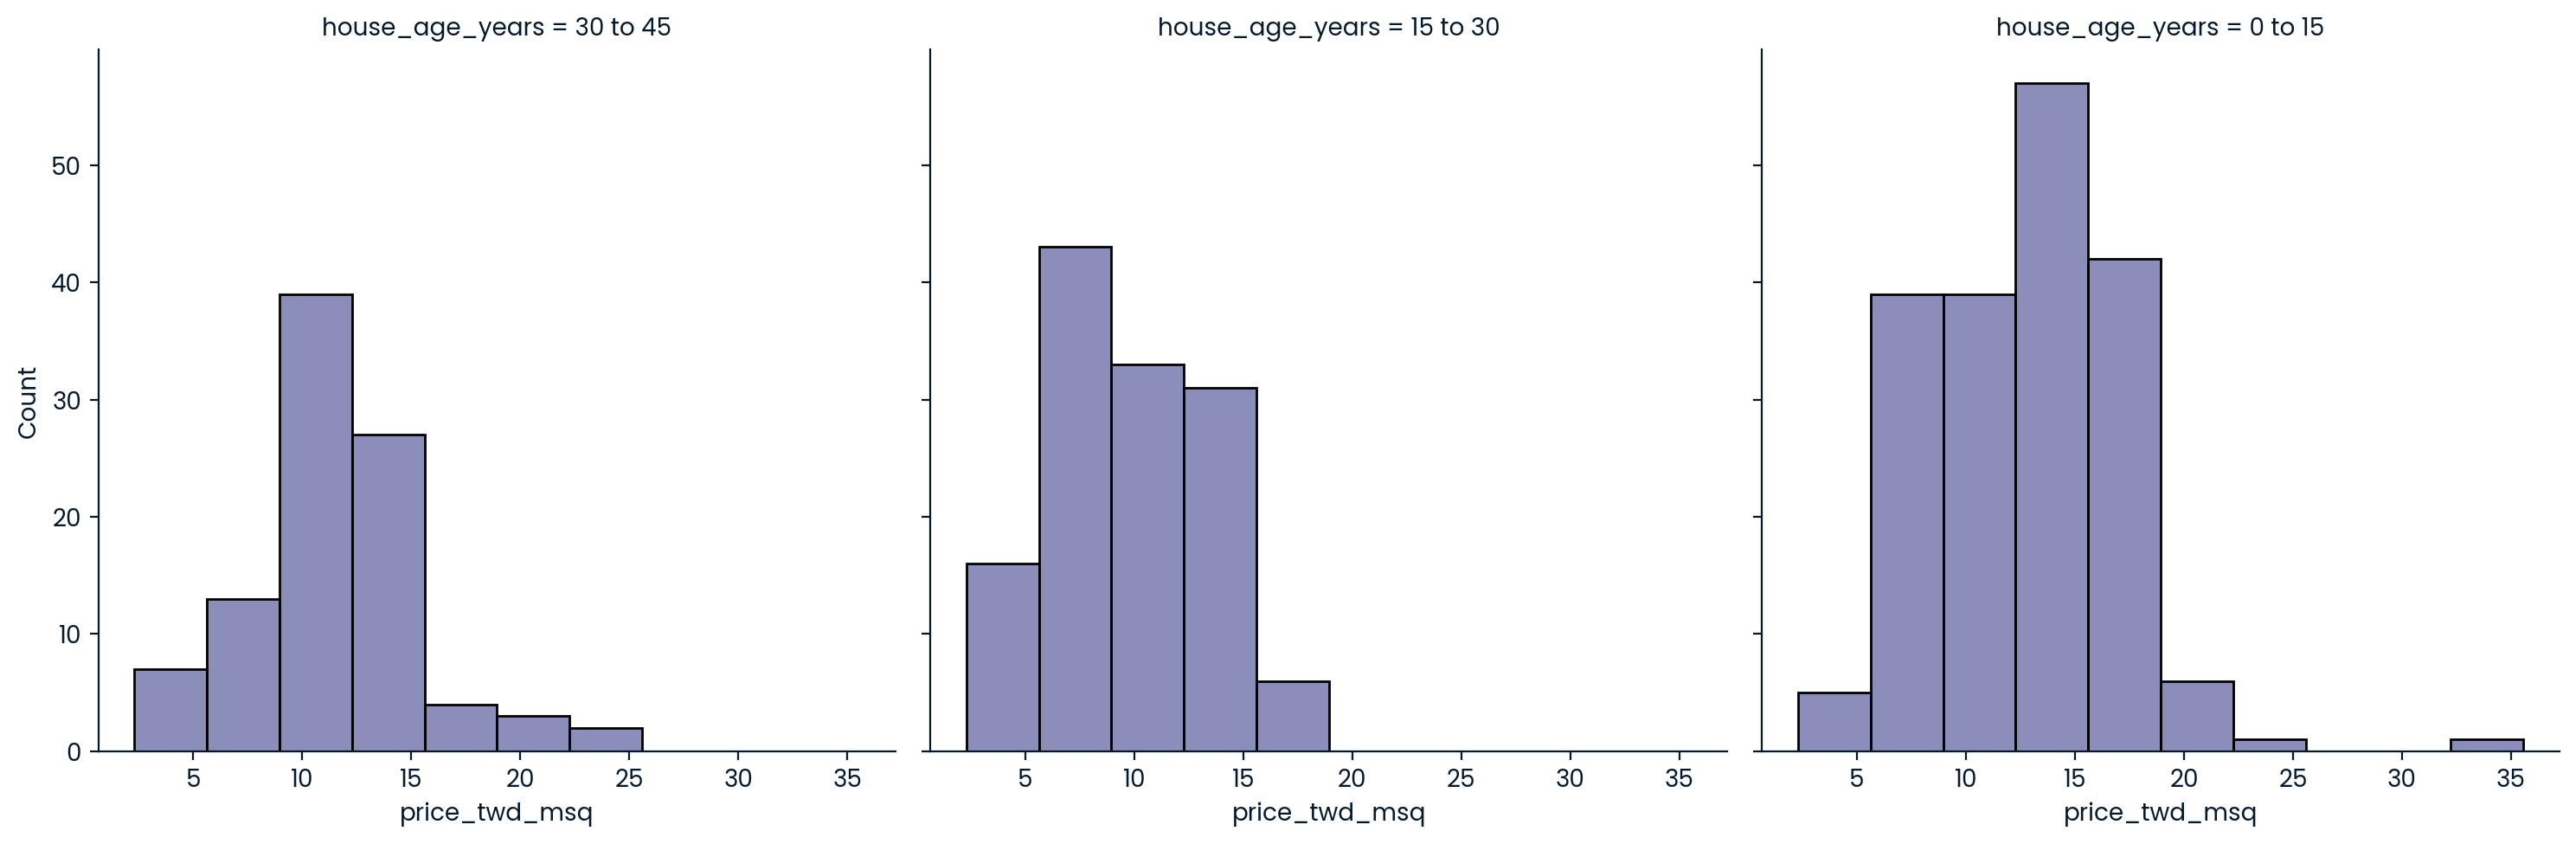

In [14]:
# Visualizing categorical variable
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         col_wrap=3,
         bins=10)

# Show the plot
plt.show()

It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

In [15]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [16]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


## Understanding the results

In the above code block we see that we received 1 intercept, and 2 other values (one for each of the "15 to 30" and "30 to 45" categories).

But by past analysis, we know that we have 3 categories in the house_age_years column. So why did we receieve parameter values for only 2 of them?

Looking closely at the results obtained, we see that the intercept = 12.637471, which is the grouped mean of the "0 to 15" category. So, we know that the Intercept = Mean(price_twd_msq of "0 to 15" house_age_years category).

What about the other parameters values?

1. house_age_years[T.15 to 30] &emsp; = &emsp;-2.760728<br>
   1.1) We see, Mean(price_twd_msq of "15 to 30" house_age_years category) - Intercept = 9.876743 - 12.637471 = -2.760728
2. house_age_years[T.30 to 45] &emsp; = &emsp;-1.244207<br>
    2.1)  We see, Mean(price_twd_msq of "30 to 45" house_age_years category) - Intercept = 11.393264 - 12.637471 = -1.244207

So, we can safely conclude that these parameters are relative to the Intercept.

In [17]:
# Updated the model formula to remove the intercept
# Here "0" means that we want to calculate w.r.t "0"
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


Hence we can conclude that: -<br>
_The coefficients of the model are just the means of each category you calculated previously._

## Predicting house prices

Here we'll make predictions for the house prices in the Taiwan real estate dataset.


**_General code to be used is:_ -<br>**
`explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})`<br>
`predictions = model.predict(explanatory_data)`<br>
`prediction_data = explanatory_data.assign(response_var=predictions)`



In [20]:
# Creating the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [24]:
# Using mdl_price_vs_conv to predict with explanatory_data, and calling it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [25]:
# Creating prediction_data, so that we can have a dataframe format for the predictions
# rather than a series format
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Having data in a DataFrame will make it easier to visualize them
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


## plt.figure()

This is used to create a new figure and to plot all the plots on one single figure (superimposed).

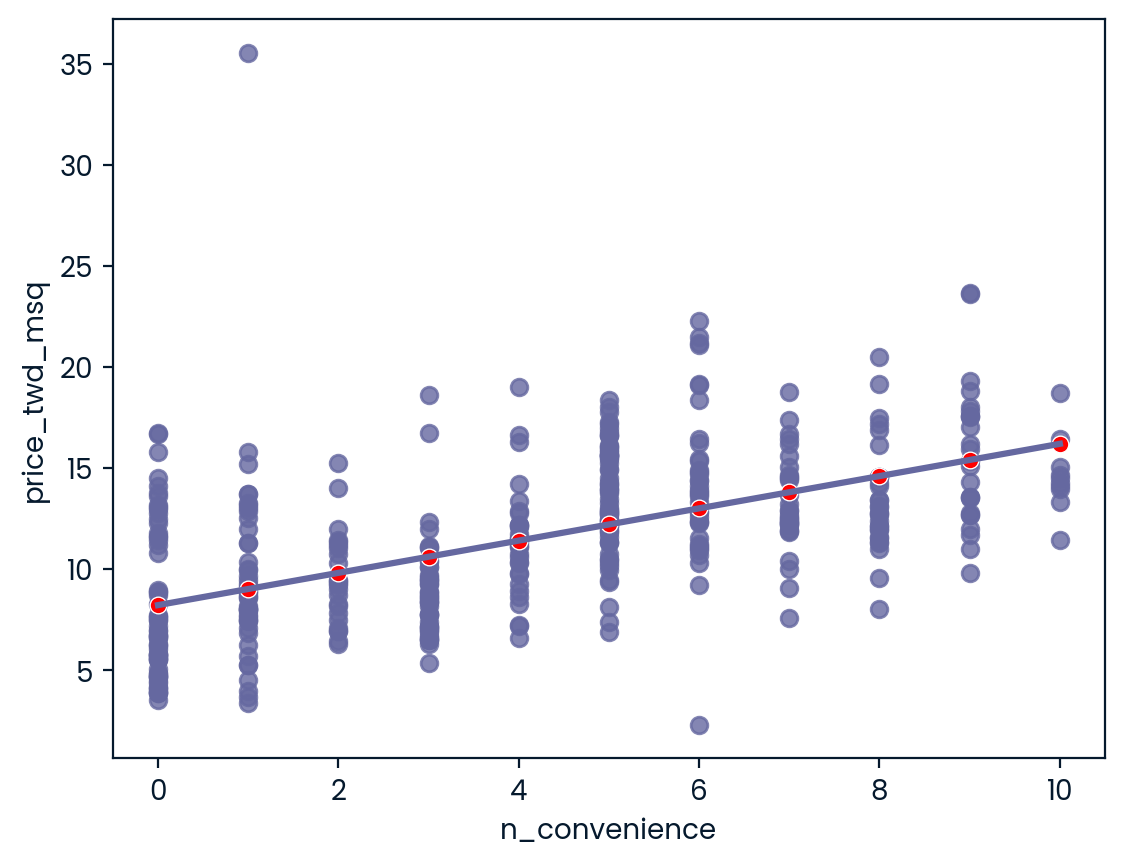

In [30]:
# Creating a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

# Adding a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color='r')

# Showing the layered plot
plt.show()

## The limits of prediction

Linear regression predictions can be extrapolated to do predictions for explanatory variable values which are not seen in the original data.<br>

But this extrapolation has its limits. It starts giving ridiculously wrong answers when we try extreme cases.<br>

We'll try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. We'll also do the same for 2.5 convenience stores.

In [34]:
impossible = mdl_price_vs_conv.predict(pd.DataFrame({'n_convenience': [-1, 2.5]}))

print(impossible)

0     7.426158
1    10.219437
dtype: float64


Linear models don't know what is possible or not in real life. That means that they can give us predictions that don't make any sense when applied to our data. 

The model object created by ols() contains many elements.

## .fittedvalues attribute
Fitted values: predictions on the originaldataset

In [42]:
mdl_price_vs_conv_fitted_values = mdl_price_vs_conv.fittedvalues
mdl_price_vs_conv_fitted_values.head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
dtype: float64

In [43]:
mdl_price_vs_conv_predict = mdl_price_vs_conv.predict(taiwan_real_estate[['n_convenience']])
mdl_price_vs_conv_predict.head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
dtype: float64

In [49]:
# checking if we are getting same results from both of these operations
(mdl_price_vs_conv_fitted_values == mdl_price_vs_conv_predict).all()

True

## .resid attribute

Residuals: actual response values minus predicted response values

In [51]:
mdl_price_vs_conv_resid = mdl_price_vs_conv.resid
mdl_price_vs_conv_resid.head()

0   -4.737561
1   -2.638422
2    2.097013
3    4.366302
4    0.826211
dtype: float64

In [55]:
taiwan_real_estate_actual_minus_predicted = taiwan_real_estate['price_twd_msq'] - mdl_price_vs_conv_fitted_values
taiwan_real_estate_actual_minus_predicted.head()

0   -4.737561
1   -2.638422
2    2.097013
3    4.366302
4    0.826211
dtype: float64

In [56]:
# checking if we are getting same results from both of these operations on residuals
(mdl_price_vs_conv_resid == taiwan_real_estate_actual_minus_predicted).all()

True

## Manually predicting house prices

For a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.<br><br>

_<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>response</mtext>
  <mo>=</mo>
  <mtext>intercept</mtext>
  <mo>+</mo>
  <mtext>slope</mtext>
  <mo>&#x2217;</mo>
  <mtext>explanatory</mtext>
</math>_

In [57]:
# Getting the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Getting the intercept
intercept = coeffs[0]

# Getting the slope
slope = coeffs[1]

# Manually calculating the predictions
price_twd_msq = intercept+slope*explanatory_data
print(price_twd_msq)

# Comparing to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


# Regression to the Means

- Response value = fitted value + residual
- "The stuff we explained" + "the stuff we couldn't explain"
- Residuals exist due to problems in the model and fundamental randomness
- Extreme cases are often due to randomness
- Regression to the mean means extreme cases don't persist over time


It is an important concept in: -
<ol>
    <li>Sports</li>
    <li>Investment</li>
</ol>


We'll be using "sp500_yearly_returns" data stored in "sp500" dataframe. It looks like this:

<table>
<tr>
    <th>variable</th>
    <th>meaning</th>
</tr>
<tr>
    <td>symbol</td>
    <td>Stock ticker symbol uniquely identifying the company.</td>
</tr>
<tr>
    <td>return_2018</td>
    <td>A measure of investment performance in 2018.</td>
</tr>
<tr>    
    <td>return_2019</td>
    <td>A measure of investment performance in 2019.</td>
</tr>

</table>

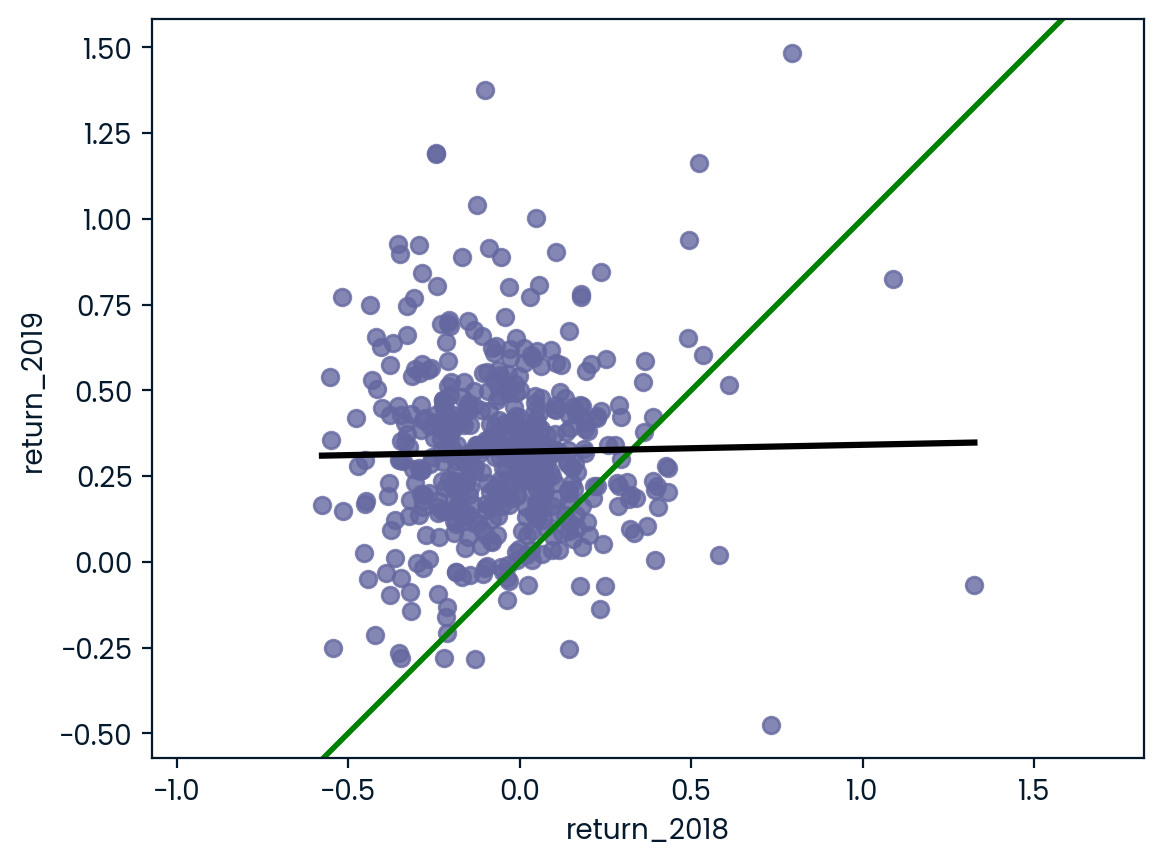

In [61]:
# Creating a new figure, fig
fig = plt.figure()

# Plotting the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Adding scatter plot with linear regression trend line
sns.regplot(x='return_2018',
                y='return_2019',
                data = sp500,
                ci=None,
                line_kws={'color': 'black'})

# Setting the axes so that the distances along the x and y axes look the same
plt.axis("equal")

plt.show()

_"Past performance is no guarantee of future results."_

Next, we'll quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

In [65]:
# Running a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols(formula='return_2019 ~ return_2018', data=sp500).fit()

print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [66]:
# Creating a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018':[-1, 0, 1]})

# Using mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


## Transforming the explanatory variable

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables.

It is a general practice to:
1. Square, cube, or in general take the power of variable(s), if the graph looks curved.
2. Take square root of variable(s) when data is right skewed.

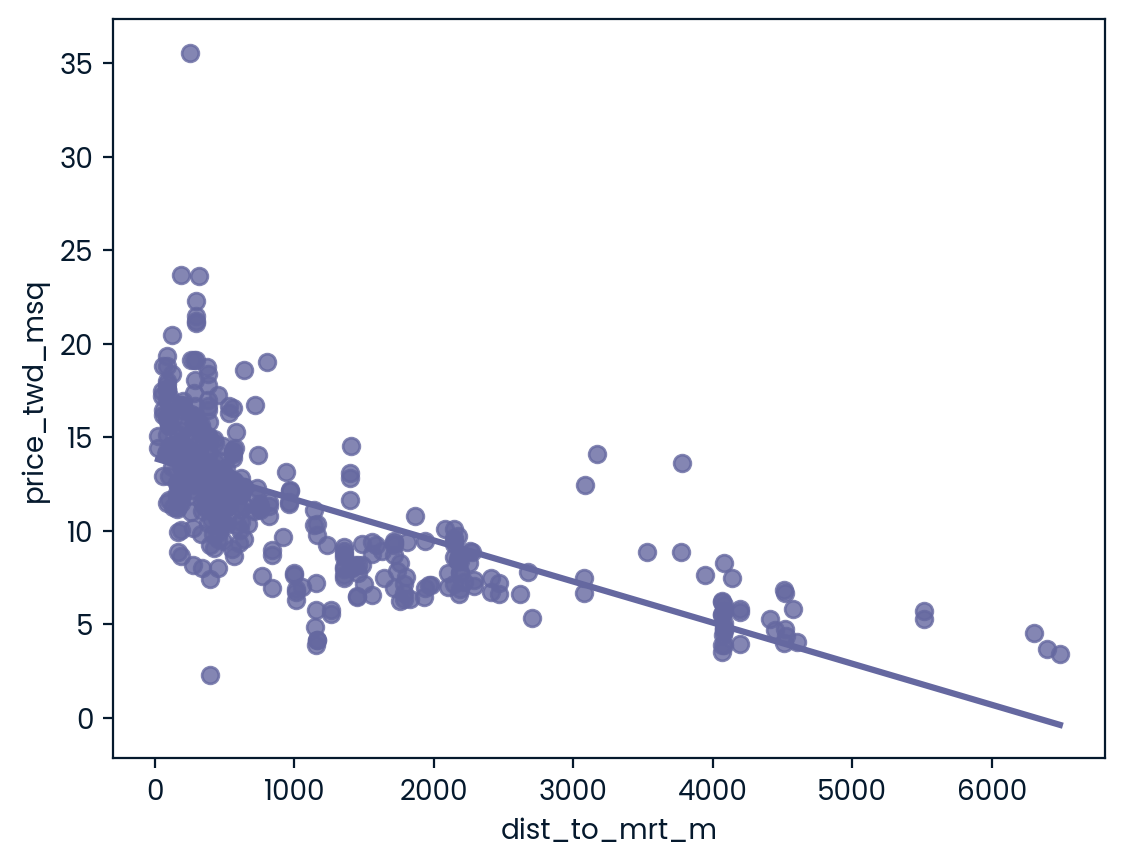

In [70]:
# let us check out the relationship between the distance to metro station and the house price
sns.regplot(x='dist_to_mrt_m',
            y='price_twd_msq',
            data=taiwan_real_estate,
            ci=None)

plt.show()

We can see a right skewed data. So, we'll try to take square root of the explanatory variable (i.e. dist_to_mrt_m).

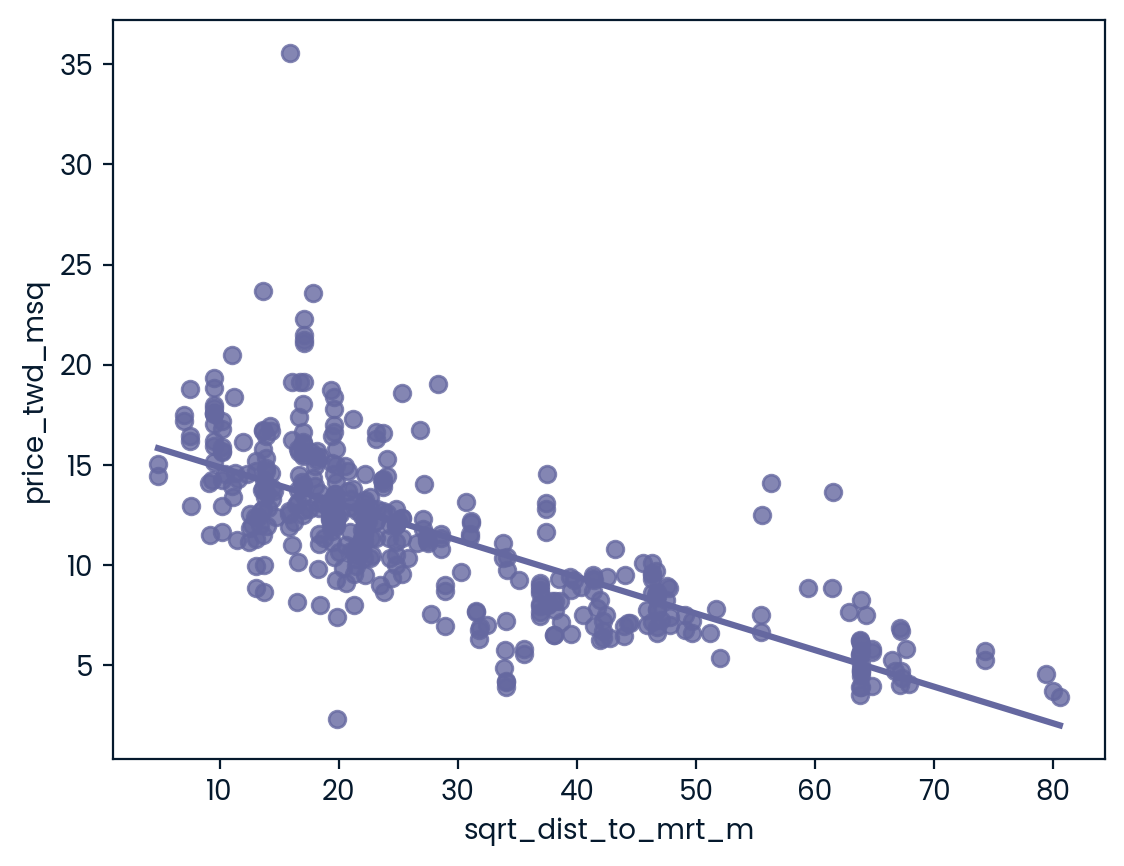

In [71]:
# Creating sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plotting using the transformed variable
sns.regplot(x='sqrt_dist_to_mrt_m',
            y='price_twd_msq',
            data=taiwan_real_estate,
            ci=None)
plt.show()

In [72]:
# Running a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols(formula='price_twd_msq ~ sqrt_dist_to_mrt_m',data=taiwan_real_estate).fit()

print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [73]:
# Creating explanatory data to be predicted on
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Creating prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


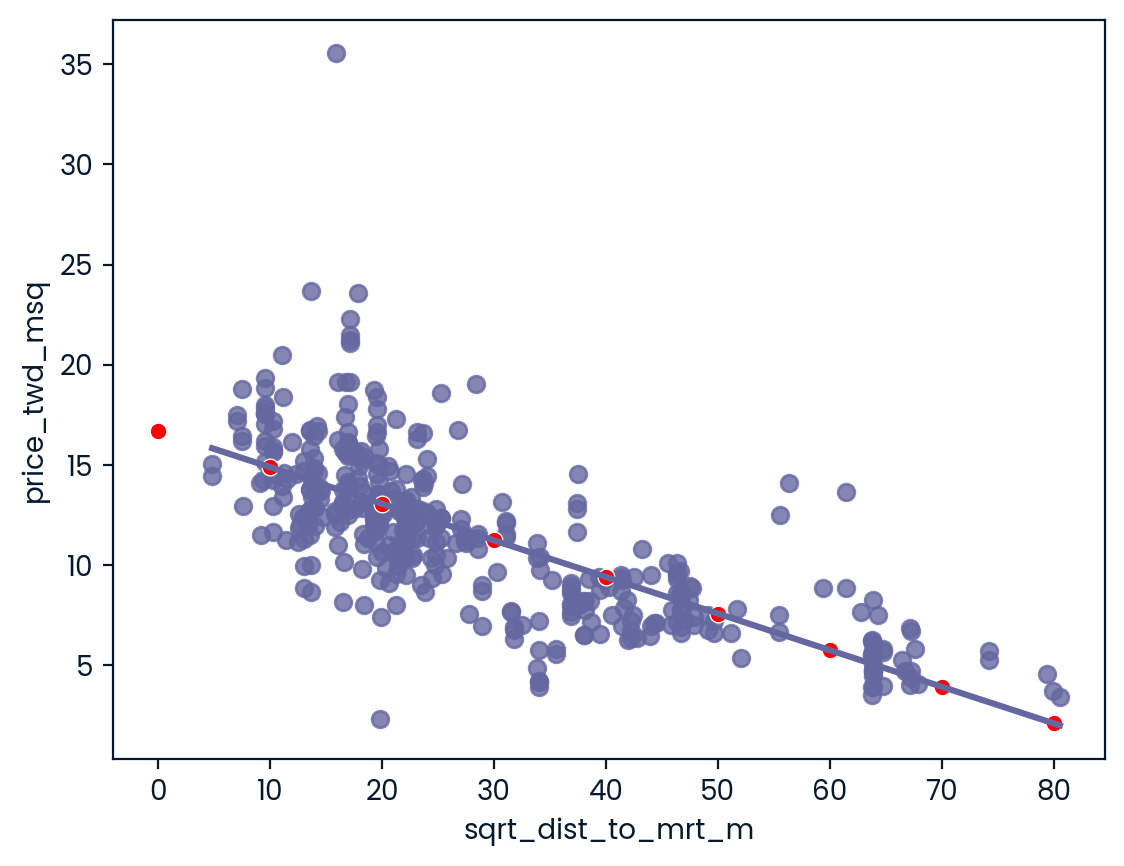

In [76]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Adding a layer of your prediction points
sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color='r')
plt.show()

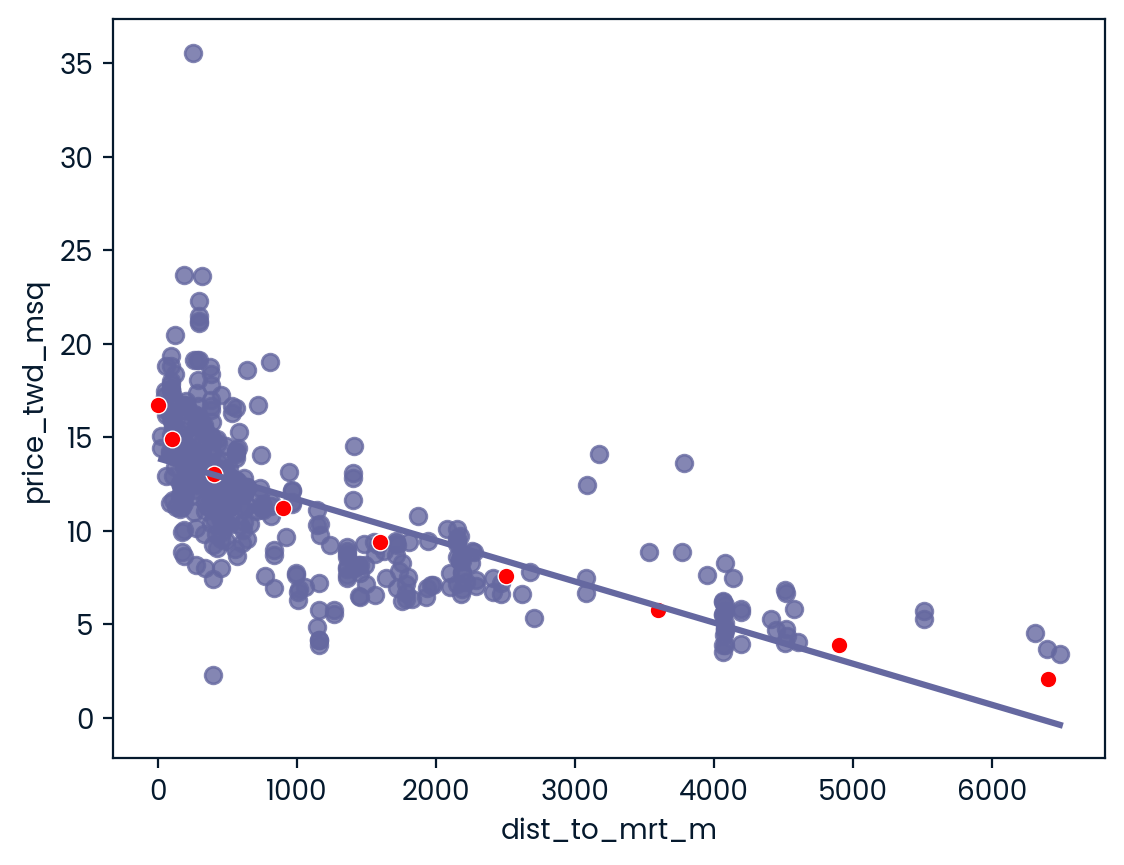

In [77]:
# checking with original dist_to_mrt_m variable
fig = plt.figure()
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Adding a layer of your prediction points
sns.scatterplot(x='dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color='r')
plt.show()

## Transforming the response variable too

The response variable can be transformed too, but this means we need an extra step at the end to undo that transformation. That is, we "back transform" the predictions.

The first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions").
The next step is determining how many people click on the advert after seeing it.

We'll look at the "ad_conversion" dataset, stored in "conversion" dataframe. We'll observe the "n_impressions" v/s "n_clicks".

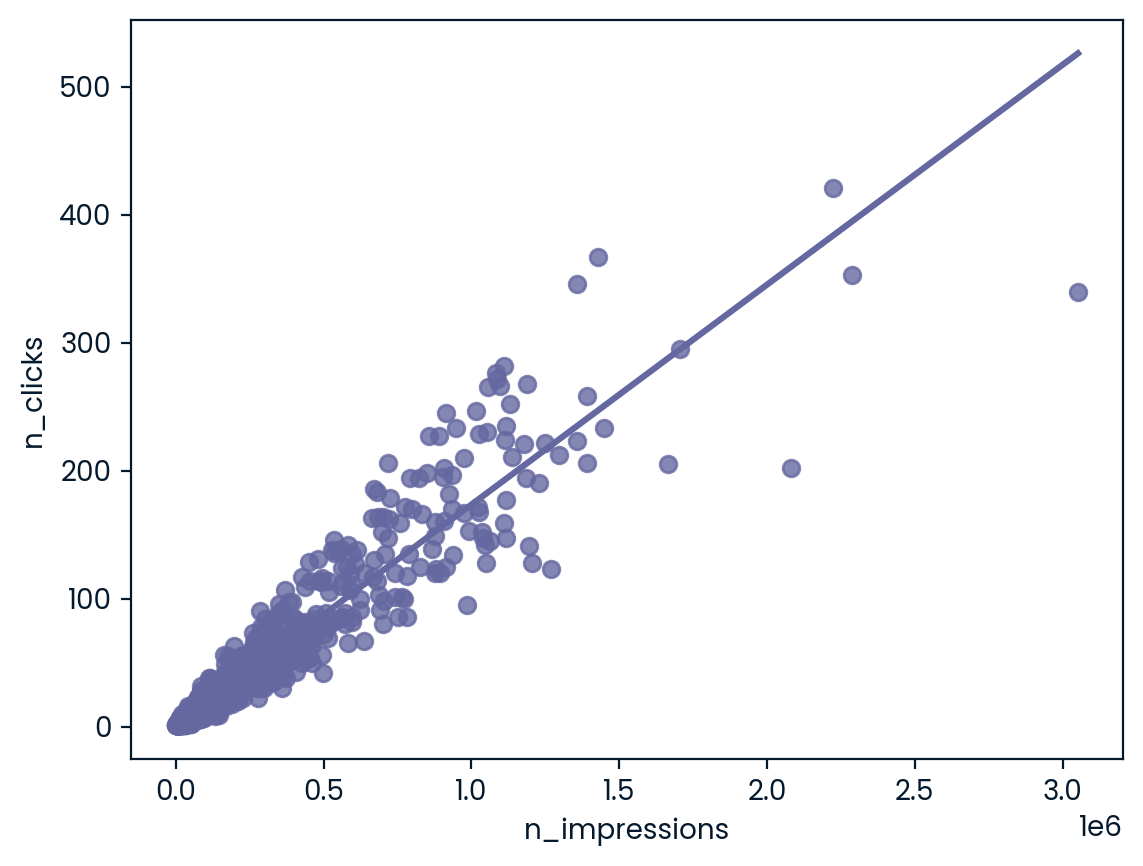

In [79]:
# Lets check out the relation between n_impressions and n_clicks
sns.regplot(x='n_impressions',
            y='n_clicks',
            data=conversion,
            ci=None)

plt.show()

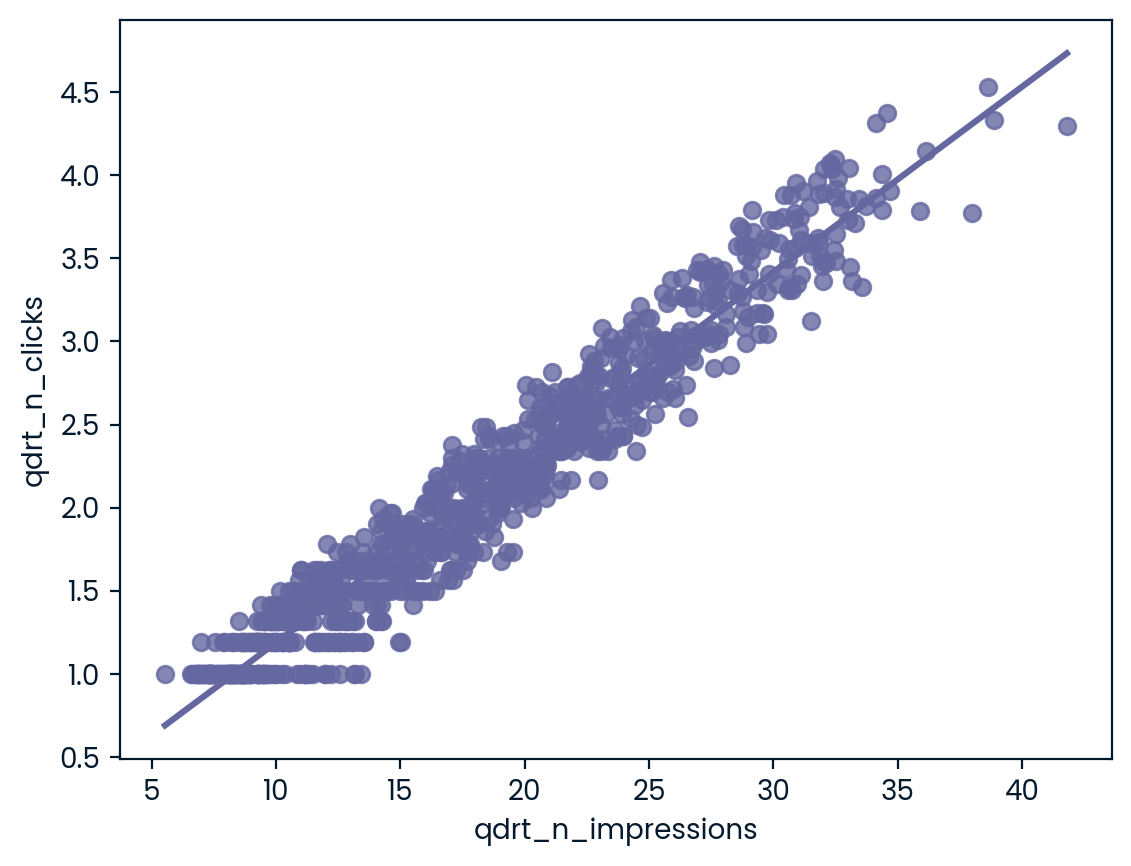

In [80]:
# Creating qdrt_n_impressions and qdrt_n_clicks
conversion["qdrt_n_impressions"] = conversion['n_impressions']**0.25
conversion["qdrt_n_clicks"] = conversion['n_clicks']**0.25

plt.figure()

# Plotting using the transformed variables
sns.regplot(x='qdrt_n_impressions',
            y='qdrt_n_clicks',
            data=conversion,
            ci=None)

plt.show()

In [82]:
# Running a linear regression of your transformed variables
mdl_click_vs_impression = ols(formula='qdrt_n_clicks ~ qdrt_n_impressions', data=conversion).fit()

mdl_click_vs_impression.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

In the below code:
- 3e6+1 = 3000001
- 5e5 = 500000

That means we are creating 6 (3e6/5e5) points in explanatory variable

In [85]:
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Completing prediction_data
prediction_data_qdrt = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

print(prediction_data_qdrt)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


In [87]:
# Back-transforming the predicted data
prediction_data_qdrt["n_clicks"] = prediction_data_qdrt['qdrt_n_clicks']**4
prediction_data_qdrt

,qdrt_n_impressions,n_impressions,qdrt_n_clicks,n_clicks
0,0.000000,0.0,0.071748,0.000026
1,26.591479,500000.0,3.037576,85.135121
2,31.622777,1000000.0,3.598732,167.725102
3,34.996355,1500000.0,3.974998,249.659131
4,37.606031,2000000.0,4.266063,331.214159
5,39.763536,2500000.0,4.506696,412.508546
6,41.617915,3000000.0,4.713520,493.607180


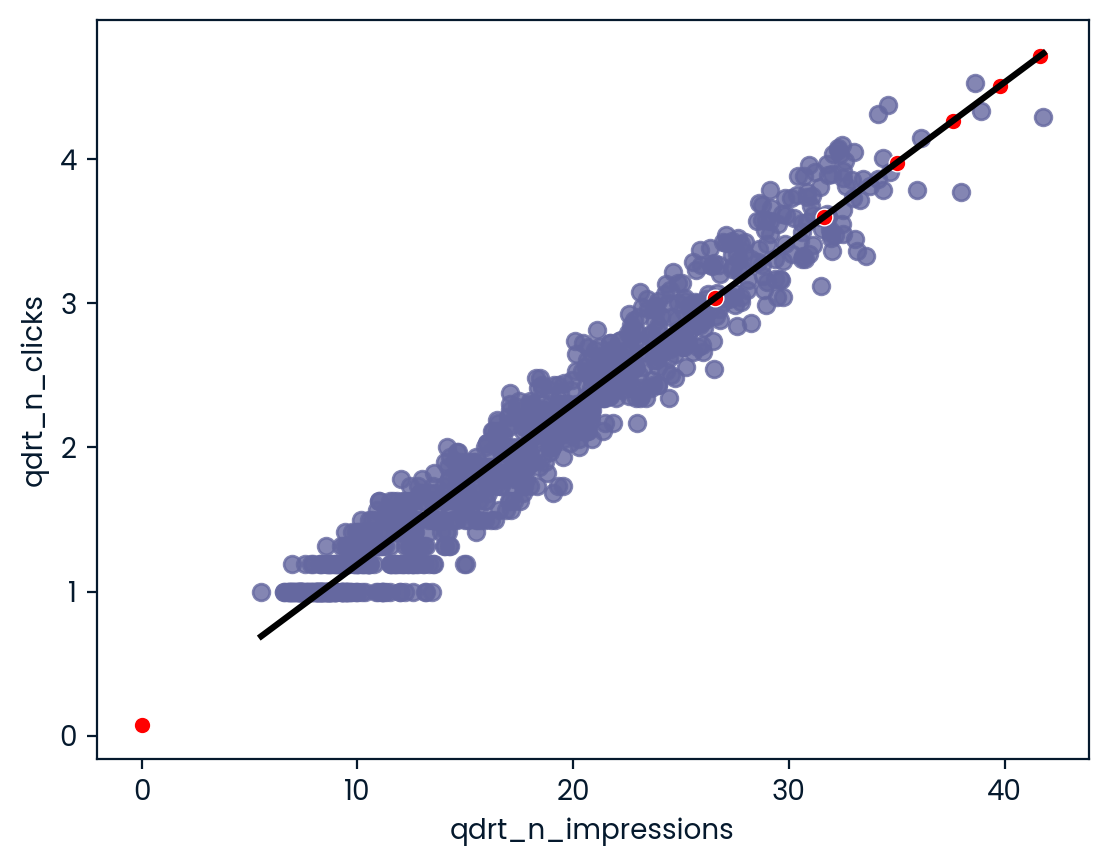

In [90]:
# Plotting the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions",
            y="qdrt_n_clicks",
            data=conversion,
            ci=None,
            line_kws={'color': 'black'})

# Adding a layer of your prediction points
sns.scatterplot(x='qdrt_n_impressions',
                y='qdrt_n_clicks',
                data=prediction_data_qdrt,
                color='r')
plt.show()

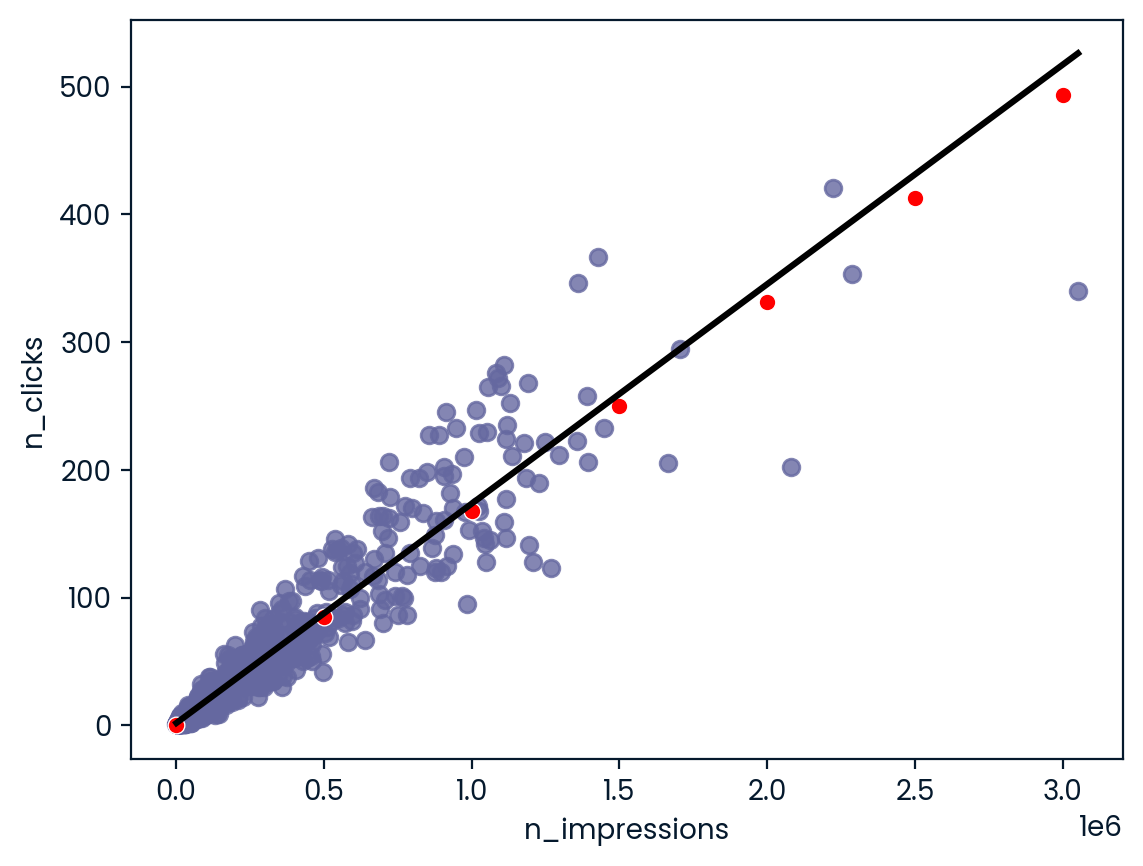

In [91]:
# Plotting the original variables
fig = plt.figure()
sns.regplot(x="n_impressions",
            y="n_clicks",
            data=conversion,
            ci=None,
            line_kws={'color': 'black'})

# Adding a layer of your prediction points
sns.scatterplot(x='n_impressions',
                y='n_clicks',
                data=prediction_data_qdrt,
                color='r')
plt.show()